#**ANÁLISIS ESTRATÉGICO: PORTAFOLIO ALURASTORE**

## Objetivo
Evaluar el desempeño de 4 tiendas físicas durante 3 años para tomar decisiones sobre
optimización del portafolio.

## Preguntas clave
1. ¿Cuál es la contribución de cada tienda a la facturación total?
2. ¿Cuáles son los productos que mueven el negocio?
3. ¿Qué tienda presenta mayor riesgo operativo?
4. ¿Cuál es la recomendación de negocio?

## Esperado: Recomendación ejecutiva clara sobre qué tienda vender o potenciar.


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# Bibliotecas a usar para gráficos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from math import pi
!pip install adjustText
from adjustText import adjust_text




##**1.Requerimiento: Análisis de facturación**

In [ ]:
# Facturación de cada tienda:

facturacion_t1 = tienda["Precio"].astype(float).sum()
facturacion_t2 = tienda2["Precio"].astype(float).sum()
facturacion_t3 = tienda3["Precio"].astype(float).sum()
facturacion_t4 = tienda4["Precio"].astype(float).sum()

# Facturación total:
facturacion_total = facturacion_t1 + facturacion_t2 + facturacion_t3 + facturacion_t4

print(f'${facturacion_total:,.0f}'.replace(",", "."))

$4.403.619.200


In [ ]:
# DF Resumen
df_resumen = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturacion": [facturacion_t1, facturacion_t2, facturacion_t3, facturacion_t4]
})

# Ordenar por facturación
df_resumen = df_resumen.sort_values("Facturacion", ascending=False)

# Formato legible

for _, fila in df_resumen.iterrows():
    tienda_nombre = fila["Tienda"]
    facturacion= fila["Facturacion"]
    print(f"{tienda_nombre}: ${facturacion:,.0f}".replace(",", "."))

Tienda 1: $1.150.880.400
Tienda 2: $1.116.343.500
Tienda 3: $1.098.019.600
Tienda 4: $1.038.375.700


###**Gráfico "Participación de cada tienda en la facturación total"**

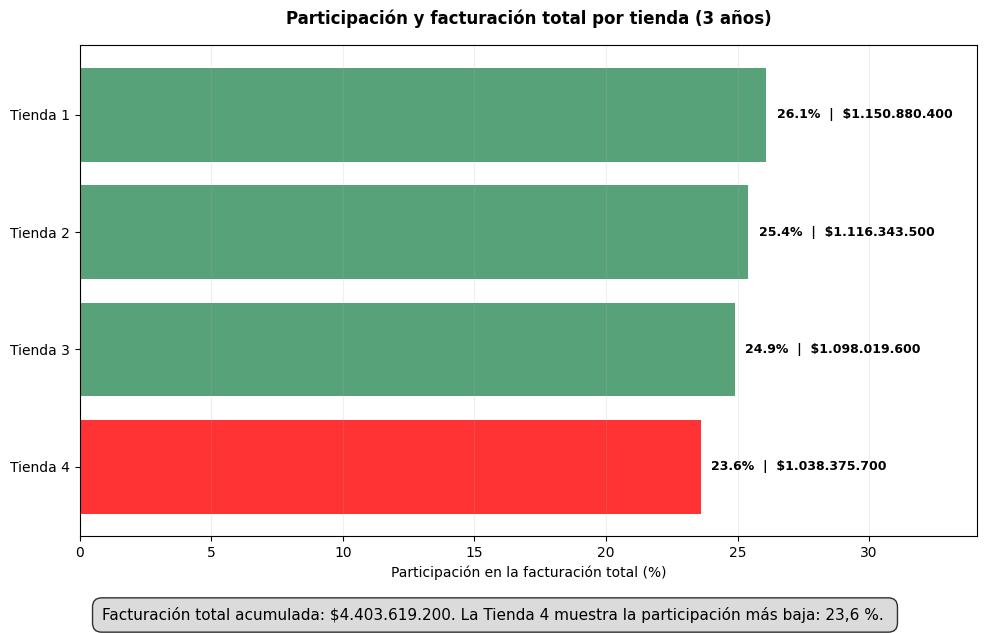

In [27]:
# Datos
df_part = df_resumen.copy()

# Participación %'
df_part["Participación %"] = (
    df_part["Facturacion"] / facturacion_total * 100
).round(1)

# Ordenar de menor a mayor
df_part = df_part.sort_values("Participación %", ascending=True).reset_index(drop=True)

# Colores
colors = df_part["Tienda"].apply(lambda x: "red" if x == "Tienda 4" else "seagreen")

plt.figure(figsize=(10, 6))

y_pos = np.arange(len(df_part))
plt.barh(y_pos, df_part["Participación %"], color=colors, alpha=0.8)

# Etiquetas del eje Y
plt.yticks(y_pos, df_part["Tienda"])

# Etiquetas a la derecha de cada barra
for i, (pct, fact) in enumerate(zip(df_part["Participación %"], df_part["Facturacion"])):
    texto = f"{pct:.1f}%  |  ${fact:,.0f}".replace(",", ".")
    plt.text(
        pct + 0.4,
        i,
        texto,
        va="center",
        fontsize=9,
        fontweight="bold",
        color="black"
    )

plt.xlabel("Participación en la facturación total (%)")
plt.title(
    "Participación y facturación total por tienda (3 años)",
    fontsize=12,
    fontweight="bold",
    pad=15
)

plt.xlim(0, df_part["Participación %"].max() + 8)
plt.grid(axis="x", alpha=0.2)
plt.subplots_adjust(bottom=0.22)
plt.figtext(
    0.5, -0.02,
    "Facturación total acumulada: $4.403.619.200. "
    "La Tienda 4 muestra la participación más baja: 23,6 %. ",
    ha='center', va='top', fontsize=11,
    bbox=dict(boxstyle="round,pad=0.6", facecolor="lightgray", alpha=0.8)
)
plt.tight_layout()
plt.savefig("Participación en la facturación total (%).png", dpi=300, bbox_inches="tight")
plt.show()


#### Hallazgo: Facturación por Tienda

**Situación:**
- Facturación total acumulada de estos 3 años: 4.403.619.200 de pesos.  
- Las Tiendas 1, 2 y 3 tienen participación similar de 25-26% c/u
- La Tienda 4 rezaga con solo 23,6%, aprox. $112M menos que Tienda 1

**Implicación:** Tienda 4 es la de menor capacidad de generación de ingresos.


##**2.Requerimiento: Ventas por categoría**

In [ ]:
# Definir una función para que me retorne la categoría más vendida para cada tienda:
def categoria_mas_vendida(df):
    categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    return categoria.idxmax(), categoria.max()

t1_cat, t1_monto = categoria_mas_vendida(tienda)
t2_cat, t2_monto = categoria_mas_vendida(tienda2)
t3_cat, t3_monto = categoria_mas_vendida(tienda3)
t4_cat, t4_monto = categoria_mas_vendida(tienda4)

# El resultado

print(f'La categoría más vendida en la tienda 1 fue:{t1_cat} con un monto de ${t1_monto:,.0f}')
print(f'La categoría más vendida en la tienda 2 fue:{t2_cat} con un monto de ${t2_monto:,.0f}')
print(f'La categoría más vendida en la tienda 3 fue:{t2_cat} con un monto de ${t3_monto:,.0f}')
print(f'La categoría más vendida en la tienda 4 fue:{t2_cat} con un monto de ${t4_monto:,.0f}')

La categoría más vendida en la tienda 1 fue:Electrónicos con un monto de $429,493,500
La categoría más vendida en la tienda 2 fue:Electrónicos con un monto de $410,831,100
La categoría más vendida en la tienda 3 fue:Electrónicos con un monto de $410,775,800
La categoría más vendida en la tienda 4 fue:Electrónicos con un monto de $409,476,100


In [ ]:
# Definir una función que calcula el top 3 de las categorías vendidas por cada tienda para realizar comparativos:
def top3_por_categoria(df, nombre_tienda):
    top3 = df.groupby("Categoría del Producto")["Precio"].sum().reset_index().sort_values("Precio", ascending=False).head(3)
    top3["Tienda"] = nombre_tienda
    return top3

# Concatenar resultados
df_top3_categorias = pd.concat(
    [
        top3_por_categoria(tienda, "Tienda 1"),
        top3_por_categoria(tienda2, "Tienda 2"),
        top3_por_categoria(tienda3, "Tienda 3"),
        top3_por_categoria(tienda4, "Tienda 4"),
    ],
    ignore_index=True,)

# Formato legible:

for _, fila in df_top3_categorias.iterrows():
    tienda_nombre = fila["Tienda"]
    categoria_mas_vendida = fila["Categoría del Producto"]
    precio = fila["Precio"]
    print(f"{tienda_nombre}: {categoria_mas_vendida}: ${precio:,.0f}".replace(",", "."))

Tienda 1: Electrónicos: $429.493.500
Tienda 1: Electrodomésticos: $363.685.200
Tienda 1: Muebles: $187.633.700
Tienda 2: Electrónicos: $410.831.100
Tienda 2: Electrodomésticos: $348.567.800
Tienda 2: Muebles: $176.426.300
Tienda 3: Electrónicos: $410.775.800
Tienda 3: Electrodomésticos: $329.237.900
Tienda 3: Muebles: $201.072.100
Tienda 4: Electrónicos: $409.476.100
Tienda 4: Electrodomésticos: $283.260.200
Tienda 4: Muebles: $192.528.900


In [ ]:
# DF Categoría más vendida
df_resumen_categorias = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], # Corrected 'Tienda' to 'Tienda 1' for consistency
    "Categoria Más Vendida": [t1_cat, t2_cat, t3_cat, t4_cat],
    "Monto Total":[t1_monto, t2_monto, t3_monto, t4_monto]
})

# Formato legible
for _, fila in df_resumen_categorias.iterrows():
    tienda_nombre = fila["Tienda"]
    categoria_mas_vendida = fila["Categoria Más Vendida"]
    monto_total = fila["Monto Total"]
    print(f"{tienda_nombre}: {categoria_mas_vendida}: ${monto_total:,.0f}".replace(",", "."))

Tienda 1: Electrónicos: $429.493.500
Tienda 2: Electrónicos: $410.831.100
Tienda 3: Electrónicos: $410.775.800
Tienda 4: Electrónicos: $409.476.100


In [ ]:
# Categorías Top y ventas totales
totales_categorias = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True).groupby("Categoría del Producto")["Precio"].sum().reset_index().sort_values(by="Precio", ascending=False)

# Formato legible
print("\nCategorías Top y Ventas Totales:\n")
for _, fila in totales_categorias.iterrows():
    categoria = fila["Categoría del Producto"]
    precio = fila["Precio"]
    print(f"{categoria}: ${precio:,.0f}".replace(",", "."))


Categorías Top y Ventas Totales:

Electrónicos: $1.660.576.500
Electrodomésticos: $1.324.751.100
Muebles: $757.661.000
Instrumentos musicales: $348.772.600
Deportes y diversión: $142.977.700
Juguetes: $73.604.400
Artículos para el hogar: $57.579.800
Libros: $37.696.100


###**Gráfico "Composición de ventas por categoría en cada tienda"**

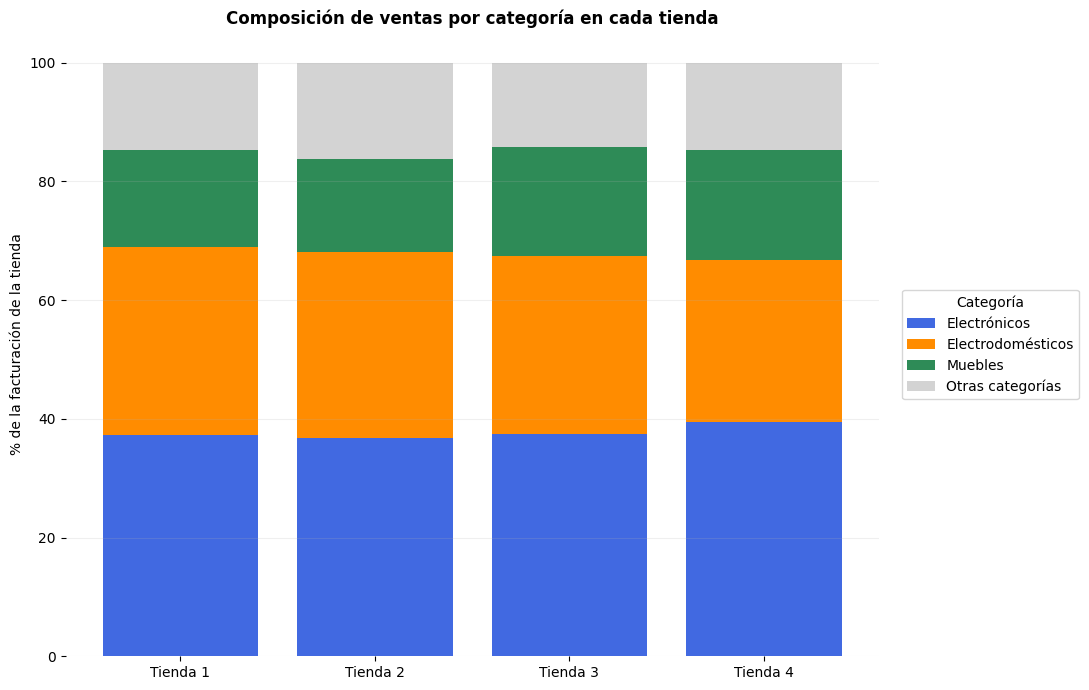

In [28]:
# Facturación total por tienda
fact_tiendas = {
    "Tienda 1": 1150880400,
    "Tienda 2": 1116343500,
    "Tienda 3": 1098019600,
    "Tienda 4": 1038375700
}

# Top 3 categorías por tienda
top3_por_tienda = {
    "Tienda 1": {
        "Electrónicos": 429493500,
        "Electrodomésticos": 363685200,
        "Muebles": 187633700
    },
    "Tienda 2": {
        "Electrónicos": 410831100,
        "Electrodomésticos": 348567800,
        "Muebles": 176426300
    },
    "Tienda 3": {
        "Electrónicos": 410775800,
        "Electrodomésticos": 329237900,
        "Muebles": 201072100
    },
    "Tienda 4": {
        "Electrónicos": 409476100,
        "Electrodomésticos": 283260200,
        "Muebles": 192528900
    }
}

tiendas = list(fact_tiendas.keys())
x = np.arange(len(tiendas))

# Listas de porcentajes por categoría
electro = []
electrodom = []
muebles = []
otras = []

for t in tiendas:
    fact = fact_tiendas[t]
    e = top3_por_tienda[t]["Electrónicos"] / fact * 100
    ed = top3_por_tienda[t]["Electrodomésticos"] / fact * 100
    m = top3_por_tienda[t]["Muebles"] / fact * 100
    o = 100 - (e + ed + m)  # resto de categorías
    electro.append(e)
    electrodom.append(ed)
    muebles.append(m)
    otras.append(o)

plt.figure(figsize=(11,7))

p1 = plt.bar(x, electro, color="royalblue", label="Electrónicos")
p2 = plt.bar(x, electrodom, bottom=electro, color="darkorange", label="Electrodomésticos")
bottom_muebles = np.array(electro) + np.array(electrodom)
p3 = plt.bar(x, muebles, bottom=bottom_muebles, color="seagreen", label="Muebles")
bottom_otras = bottom_muebles + np.array(muebles)
p4 = plt.bar(x, otras, bottom=bottom_otras, color="lightgray", label="Otras categorías")

plt.xticks(x, tiendas)
plt.ylabel("% de la facturación de la tienda")
plt.title("Composición de ventas por categoría en cada tienda", fontsize=12, fontweight="bold")
plt.ylim(0, 105)
plt.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    title="Categoría"
)
plt.grid(axis="y", alpha=0.2)

plt.tight_layout()
plt.savefig("Composición de ventas por categoría en cada tienda.png", dpi=300, bbox_inches="tight")
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

##**3.Requerimiento: Calificación promedio de la tienda**

In [ ]:
# Lista con los DF originales para usarla en el cálculo
tiendas = [tienda, tienda2, tienda3, tienda4]
# Luego aplicamos el cálculo del promedio para cada elemento en la lista
promedios = [round(t["Calificación"].mean(), 2) for t in tiendas]
promedio_mas_alto = max(promedios)
print(f'EL mayor prodmeio obtenido es: {promedio_mas_alto}')

EL mayor prodmeio obtenido es: 4.05


In [ ]:
# Y por último ya tenemos listos los datos para llevarlo a DF
tiendas_promedios = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Promedio": promedios
})
tiendas_promedios

,Tienda,Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


###**Gráfico "Incidencia de la calificación en la facturación total"**

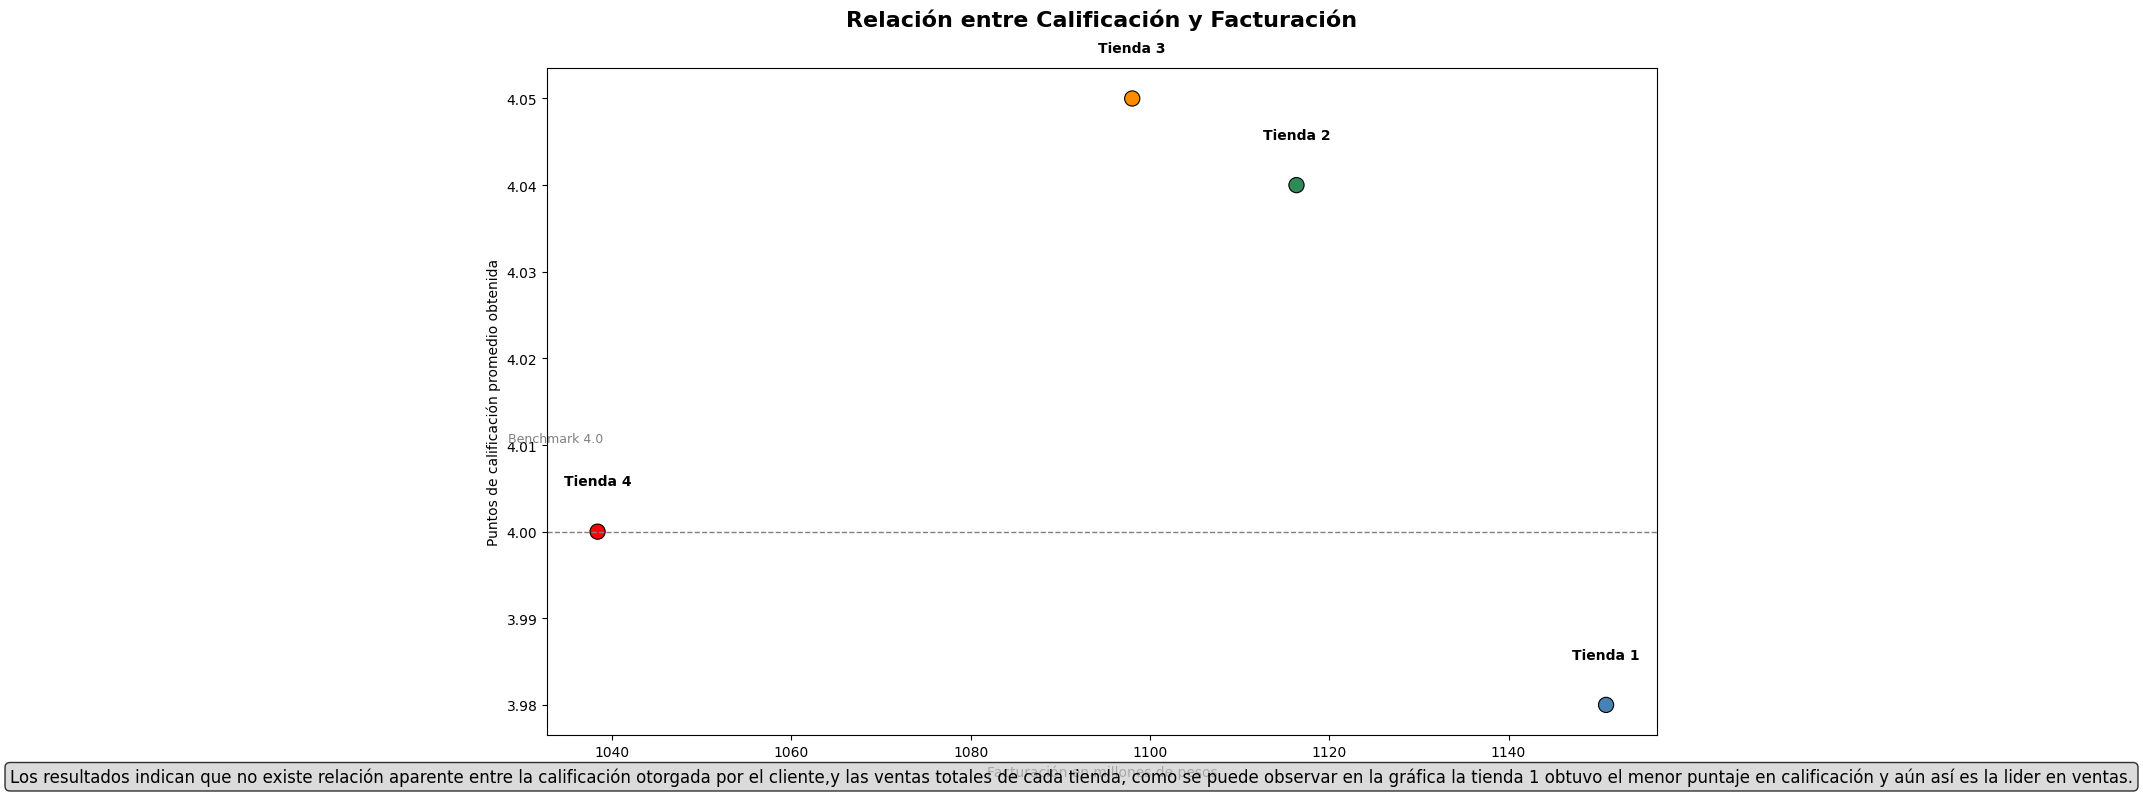

In [31]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion = [1150880400, 1116343500, 1098019600, 1038375700]
calificacion = [3.98, 4.04, 4.05, 4.00]

# Facturación en millones para que se lea mejor
fact_millones = [f/1e6 for f in facturacion]

plt.figure(figsize=(12,8))

# Colores:
color_map = {
    "Tienda 1": "steelblue",
    "Tienda 2": "seagreen",
    "Tienda 3": "darkorange",
    "Tienda 4": "red"
}
colors = [color_map[t] for t in tiendas]

plt.scatter(fact_millones, calificacion, s=120, color=colors, edgecolors="black", linewidths=0.8)

# Etiquetas con nombre de tienda
for x, y, t in zip(fact_millones, calificacion, tiendas):
    plt.text(x, y+0.005, t, ha="center", va="bottom", fontsize=10, fontweight="bold")

# Línea horizontal benchmark satisfacción
plt.axhline(4.0, color="gray", linestyle="--", linewidth=1)
plt.text(min(fact_millones)-10, 4.0+0.01, "Benchmark 4.0", color="gray", fontsize=9, va="bottom")
plt.title(
    "Relación entre Calificación y Facturación",
    fontsize=16,
    fontweight="bold",
    pad=30
)

plt.xlabel("Facturación en millones de pesos")
plt.ylabel ("Puntos de calificación promedio obtenida")

plt.figtext(0.5, 0.01,
           "Los resultados indican que no existe relación aparente entre la calificación otorgada por el cliente,"
           "y las ventas totales de cada tienda, como se puede observar en la gráfica la tienda 1 obtuvo el menor "
           "puntaje en calificación y aún así es la lider en ventas.",
           ha='center', va='bottom', fontsize=12,
           bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.savefig("Relación entre Calificación y Facturación.png", dpi=300, bbox_inches="tight")
plt.show()

#### Hallazgo: Satisfacción del Cliente  

**Situación:**
- Todas las tiendas tienen excelentes calificaciones (3.98–4.05/5.0)
- La Tienda 3 lidera con 4.05, Tienda 4 en tercer lugar  4.00

| Tienda | Calificación | Rango |
|--------|--------------|-------|
| Tienda 3 | **4.05** | 1ra |
| Tienda 2 | **4.04** | 2da |
| Tienda 4 | **4.00** | 3ra |
| Tienda 1 | **3.98** | 4ta |

**Implicación:**
- Fortaleza general en experiencia del cliente
- La Tienda 4 no es problema en satisfacción, se deben considerar otros factores como causa de su bajo rendimiento.
- La Tienda 1 es la que más debe mejorar 3.98


##**4.Requerimiento: Productos más y menos vendidos**

In [ ]:
# Función para obtener top5 y productos min/max
def procesar_tienda(nombre, df):

    # Agrupar ventas por producto
    productos = (
        df.groupby("Producto", as_index=False)["Precio"].sum()
          .rename(columns={"Precio": "Ventas"})
          .sort_values("Ventas", ascending=False)
    )

    # Identificar el Top 5 de cada tienda
    df_top5 = productos.head(5).copy()
    df_top5["Total_top5_tienda"] = df_top5["Ventas"].sum()
    df_top5["Tienda"] = nombre

    # Producto más y menos vendido
    mas_vendido = productos.iloc[0]
    menos_vendido = productos.iloc[-1]

    datos_minmax = {
        "Tienda": nombre,
        "Producto_mas_vendido": mas_vendido["Producto"],
        "Ventas_mas_vendido": mas_vendido["Ventas"],
        "Producto_menos_vendido": menos_vendido["Producto"],
        "Ventas_menos_vendido": menos_vendido["Ventas"],
    }

    return df_top5, datos_minmax


# Lista de tiendas
tiendas = [
    ("Tienda 1", tienda),
    ("Tienda 2", tienda2),
    ("Tienda 3", tienda3),
    ("Tienda 4", tienda4),
]

# Listas para guardar resultados
top5_list = []
minmax_list = []

# Procesar todas las tiendas en un solo loop
for nombre, df in tiendas:
    df_top5, datos_minmax = procesar_tienda(nombre, df)
    top5_list.append(df_top5)
    minmax_list.append(datos_minmax)

df_top_tiendas = pd.concat(top5_list, ignore_index=True)
df_general_minmax = pd.DataFrame(minmax_list)

# Formato legible solo al visualizar

df_top_tiendas_formateado = df_top_tiendas.style.format({
    "Ventas": lambda x: "{:,.0f}".format(x).replace(",", "."),
    "Total_top5_tienda": lambda x: "{:,.0f}".format(x).replace(",", ".")
})

df_general_minmax_formateado = df_general_minmax.style.format({
    "Ventas_mas_vendido": lambda x: "{:,.0f}".format(x).replace(",", "."),
    "Ventas_menos_vendido": lambda x: "{:,.0f}".format(x).replace(",", ".")
})

#Resultado

df_general_minmax_formateado

,Tienda,Producto_mas_vendido,Ventas_mas_vendido,Producto_menos_vendido,Ventas_menos_vendido
0,Tienda 1,TV LED UHD 4K,142.150.200,Cuerda para saltar,652.800
1,Tienda 2,Iphone 15,113.225.800,Cubo mágico 8x8,643.600
2,Tienda 3,Refrigerador,99.889.700,Cubo mágico 8x8,640.400
3,Tienda 4,Iphone 15,96.697.500,Cuerda para saltar,704.800


In [ ]:
df_top_tiendas_formateado

,Producto,Ventas,Total_top5_tienda,Tienda
0,TV LED UHD 4K,142.150.200,485.431.400,Tienda 1
1,Refrigerador,112.143.300,485.431.400,Tienda 1
2,Iphone 15,97.902.200,485.431.400,Tienda 1
3,Smart TV,67.452.100,485.431.400,Tienda 1
4,Lavadora de ropa,65.783.600,485.431.400,Tienda 1
5,Iphone 15,113.225.800,442.137.600,Tienda 2
6,TV LED UHD 4K,103.375.000,442.137.600,Tienda 2
7,Refrigerador,97.632.500,442.137.600,Tienda 2
8,Lavadora de ropa,66.762.300,442.137.600,Tienda 2
9,Smart TV,61.142.000,442.137.600,Tienda 2


###**Gráfico "Incidencia del Producto más vendido en la facturación"**

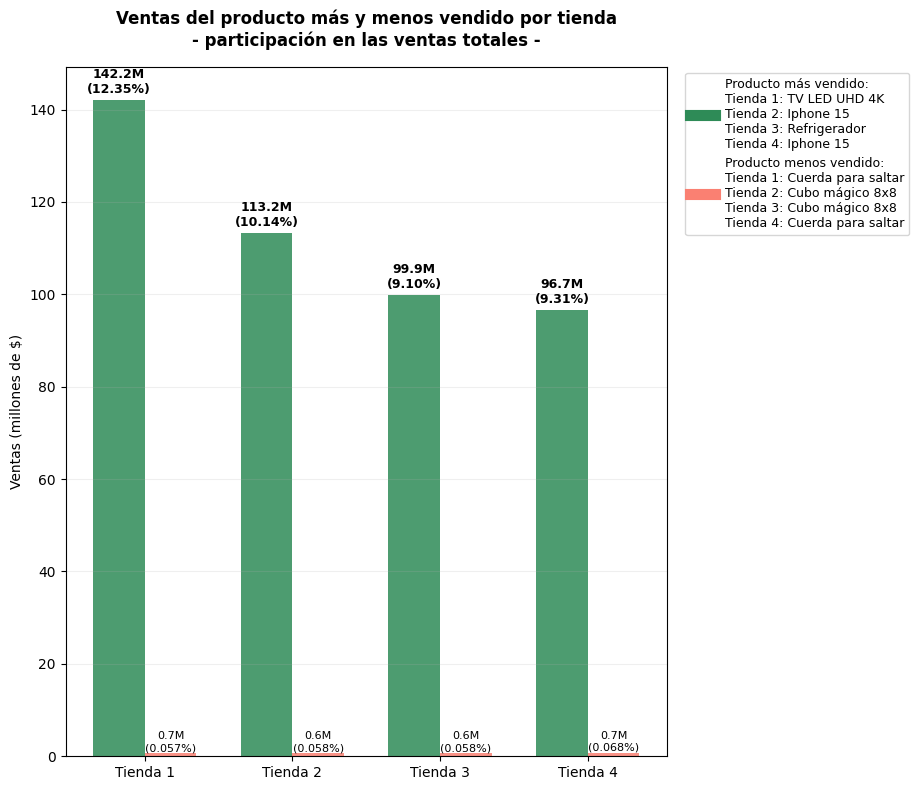

In [33]:
# Datos
df_plot = df_general_minmax.copy()
df_plot = df_plot.merge(df_resumen[['Tienda', 'Facturacion']], on='Tienda', how='left')

# Calcular los porcentajes
df_plot["Pct_top_global"] = (df_plot["Ventas_mas_vendido"] / df_plot["Facturacion"]) * 100
df_plot["Pct_bottom_global"] = (df_plot["Ventas_menos_vendido"] / df_plot["Facturacion"]) * 100

df_plot[["Top_millones", "Bottom_millones"]] = df_plot[
    ["Ventas_mas_vendido", "Ventas_menos_vendido"]
] / 1e6

# Gráfico
tt_tiendas = df_plot["Tienda"].to_list()
x = np.arange(len(tt_tiendas))
width = 0.35

plt.figure(figsize=(12, 8))

# Barras
bars_top = plt.bar(
    x - width/2,
    df_plot["Top_millones"],
    width,
    color="seagreen",
    alpha=0.85,
    label="Producto más vendido"
)

bars_bottom = plt.bar(
    x + width/2,
    df_plot["Bottom_millones"],
    width,
    color="salmon",
    alpha=0.85,
    label="Producto menos vendido"
)

# Texto de valores y participación
for i, row in df_plot.iterrows():
    plt.text(
        x[i] - width/2,
        row.Top_millones + 0.8,
        f"{row.Top_millones:.1f}M\n({row.Pct_top_global:.2f}%)",
        ha="center", va="bottom", fontsize=9, fontweight="bold"
    )
    plt.text(
        x[i] + width/2,
        row.Bottom_millones + 0.05,
        f"{row.Bottom_millones:.1f}M\n({row.Pct_bottom_global:.3f}%)",
        ha="center", va="bottom", fontsize=8
    )

plt.xticks(x, tt_tiendas)
plt.ylabel("Ventas (millones de $)")
plt.title(
    "Ventas del producto más y menos vendido por tienda\n"
    "- participación en las ventas totales -",
    fontsize=12, fontweight="bold", pad=15
)

# Leyendas: una por serie, con listas de productos
legend_top = "\n".join(
    f"{t}: {p}" for t, p in zip(df_plot.Tienda, df_plot.Producto_mas_vendido)
)
legend_bottom = "\n".join(
    f"{t}: {p}" for t, p in zip(df_plot.Tienda, df_plot.Producto_menos_vendido)
)

h1 = plt.Line2D([], [], color="seagreen", linewidth=8)
h2 = plt.Line2D([], [], color="salmon", linewidth=8)

plt.legend(
    [h1, h2],
    [
        "Producto más vendido:\n" + legend_top,
        "Producto menos vendido:\n" + legend_bottom
    ],
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    fontsize=9,
    frameon=True
)

plt.grid(axis="y", alpha=0.2)
plt.tight_layout(rect=[0, 0, 0.78, 1])
plt.savefig("Ventas del producto más y menos vendido por tienda-participación en las ventas totales.png", dpi=300, bbox_inches="tight")
plt.show()

#### Hallazgo: Concentración de Ventas

**Situación:**
- El Top 5 de productos representa 32,3% de la facturación total. Lo que refleja una cartera muy concentrada en pocas líneas.

**Implicación:**
- Por un lado entrega líneas claras y demanda predecible, lo que puede ser bueno.

- Por el otro, denota una marcada dependencia de pocos SKUs.


##**5.Requerimiento: Envío promedio por tienda**

In [ ]:
# Diccionario para crear DF
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}
# DF con promedios por tienda
total_envio_prom = pd.DataFrame({
    "Tienda": list(tiendas.keys()),
    "Envio Promedio": [round(df["Costo de envío"].astype(float).mean(), 2) for df in tiendas.values()]
})
total_envio_prom

,Tienda,Envio Promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


###**Gráfico "Relación entre el costo de envío y la facturación total"**

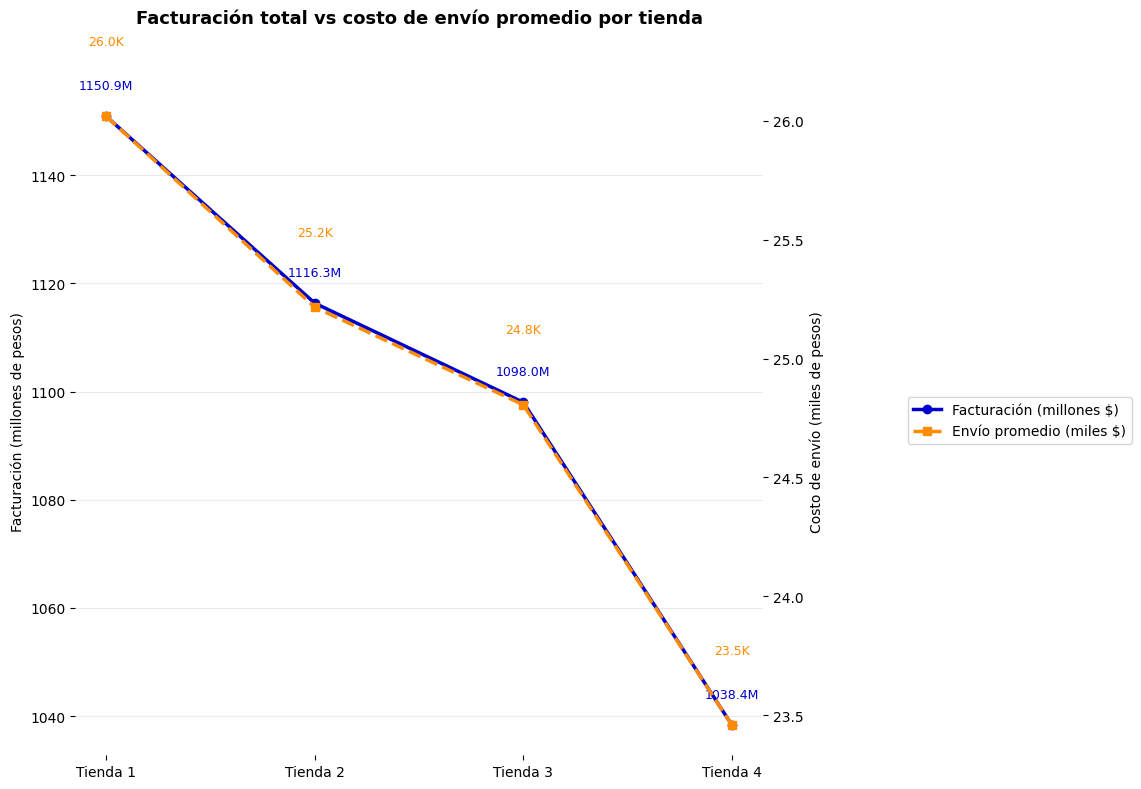

In [35]:
total_envio_prom = total_envio_prom.merge(df_resumen[['Tienda', 'Facturacion']], on='Tienda', how='left')
total_envio_prom["Fact_millones"] = total_envio_prom["Facturacion_y"] / 1e6  # facturación en millones
total_envio_prom["Envio_miles"] = total_envio_prom["Envio Promedio"] / 1e3      # envío en miles (mejor escala)

x = total_envio_prom["Tienda"]

plt.figure(figsize=(12,8))

# Facturación eje Y
ax1 = plt.gca()
line1 = ax1.plot(
    x,
    total_envio_prom["Fact_millones"],
    marker="o",
    linewidth=2.5,
    color="mediumblue",
    label="Facturación (millones $)"
)[0]
ax1.set_ylabel("Facturación (millones de pesos)")
ax1.grid(axis="y", alpha=0.25)

# Etiquetas de facturación
for i, value in enumerate(total_envio_prom["Fact_millones"]):
    ax1.text(
        i,
        value + 5,
        f"{value:.1f}M",
        ha="center",
        fontsize=9,
        color="mediumblue"
    )

# Segundo eje Y → Envío promedio
ax2 = ax1.twinx()
line2 = ax2.plot(
    x,
    total_envio_prom["Envio_miles"],
    marker="s",
    linewidth=2.5,
    linestyle="--",
    color="darkorange",
    label="Envío promedio (miles $)"
)[0]
ax2.set_ylabel("Costo de envío (miles de pesos)")

# Etiquetas de envío
for i, value in enumerate(total_envio_prom["Envio_miles"]):
    ax2.text(
        i,
        value + 0.3,
        f"{value:.1f}K",
        ha="center",
        fontsize=9,
        color="darkorange"
    )

# Título
plt.title(
    "Facturación total vs costo de envío promedio por tienda",
    fontsize=13,
    fontweight="bold",
    pad=45
)

# Leyenda
plt.legend([line1, line2], ["Facturación (millones $)", "Envío promedio (miles $)"],
           loc="center left", bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()

for spine in ax1.spines.values():
    spine.set_visible(False)

for spine in ax2.spines.values():
    spine.set_visible(False)
plt.savefig("Facturación total vs costo de envío promedio por tienda.png", dpi=300, bbox_inches="tight")
plt.show()

##**6.Análisis Extra: Análisis del desempeño geográfico**


In [ ]:
#Concatenar los DF originales
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df_geo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

#DF Geográfico General
top10_general = (
    df_geo.groupby("Lugar de Compra")["Precio"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
# Dar formato legible
for _, fila in top10_general.iterrows():
    ciudad = fila["Lugar de Compra"]
    precio = fila["Precio"]
    print(f"{ciudad}: ${precio:,.0f}".replace(",", "."))


Bogotá: $1.814.858.300
Medellín: $1.096.669.200
Cali: $506.526.100
Pereira: $225.927.300
Barranquilla: $132.040.500
Cartagena: $102.376.700
Cúcuta: $99.369.100
Bucaramanga: $90.573.300
Riohacha: $73.879.700
Leticia: $67.149.900


In [ ]:
#DF geográfico por tienda

top10_por_tienda = {}

for tienda_name, df in df_geo.groupby("Tienda"):
    top10_por_tienda[tienda_name] = (
        df.groupby("Lugar de Compra")["Precio"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
# Formato legible

for tienda_name, df in top10_por_tienda.items():
    print(f"\nTop 10 de {tienda_name}:\n")

    for _, fila in df.iterrows():
        ciudad = fila["Lugar de Compra"]
        precio = fila["Precio"]
        print(f"{ciudad}: ${precio:,.0f}".replace(",", "."))


Top 10 de Tienda 1:

Bogotá: $440.005.000
Medellín: $296.858.100
Cali: $154.493.700
Pereira: $56.214.300
Cúcuta: $37.879.500
Barranquilla: $32.907.700
Cartagena: $22.296.700
Riohacha: $18.512.700
Bucaramanga: $17.579.200
Pasto: $14.996.400

Top 10 de Tienda 2:

Bogotá: $479.959.200
Medellín: $297.246.700
Cali: $118.257.600
Pereira: $43.073.800
Cúcuta: $28.991.500
Barranquilla: $27.741.300
Bucaramanga: $23.895.600
Cartagena: $21.548.300
Leticia: $16.159.000
Santa Marta: $13.829.300

Top 10 de Tienda 3:

Bogotá: $475.562.100
Medellín: $250.580.600
Cali: $109.287.600
Pereira: $62.504.500
Barranquilla: $36.768.500
Cartagena: $34.144.100
Cúcuta: $25.165.500
Bucaramanga: $23.538.900
Leticia: $19.212.800
Riohacha: $19.025.900

Top 10 de Tienda 4:

Bogotá: $419.332.000
Medellín: $251.983.800
Cali: $124.487.200
Pereira: $64.134.700
Barranquilla: $34.623.000
Bucaramanga: $25.559.600
Cartagena: $24.387.600
Riohacha: $23.684.700
Leticia: $17.108.300
Pasto: $14.416.500


###**Gráfico "Comparativo Top 10 de Ciudades detallado por tienda por Tienda"**

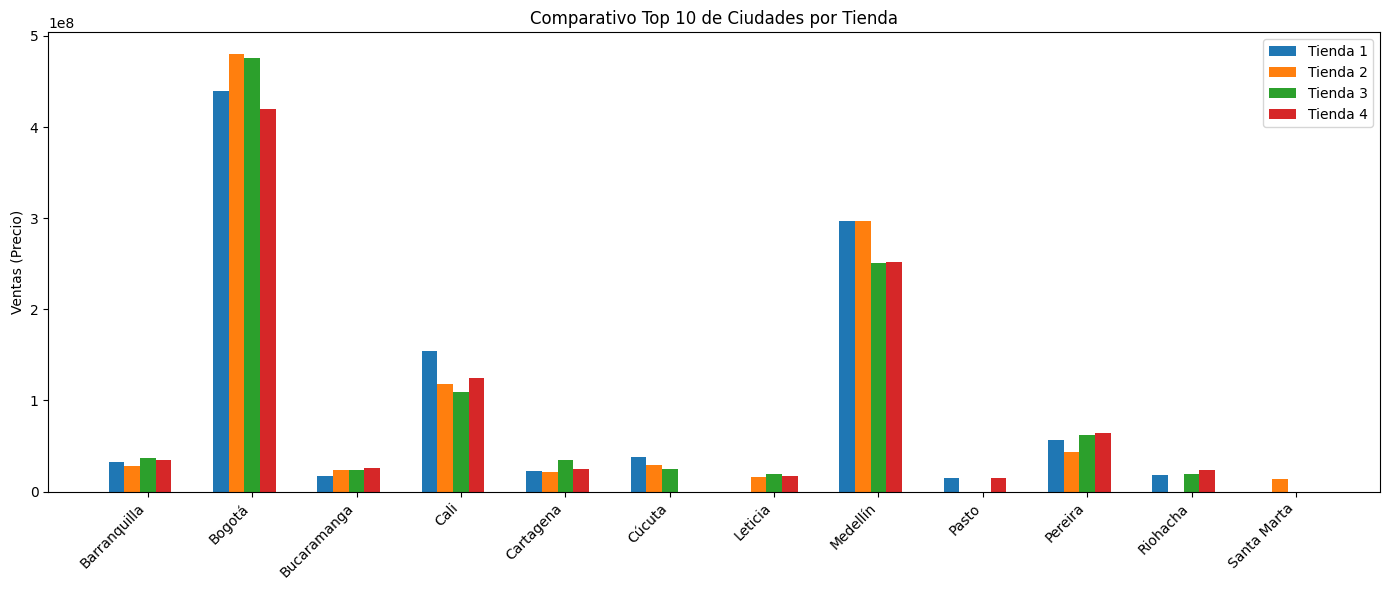

In [36]:
top10_por_tienda = {}

for tienda_name, df in df_geo.groupby("Tienda"):
    top10_por_tienda[tienda_name] = (
        df.groupby("Lugar de Compra")["Precio"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
#Unir todos los top 10 en un DF para graficar
top10_combinados = []
for tienda_name, df in top10_por_tienda.items():
    df2 = df.copy()
    df2["Tienda"] = tienda_name
    top10_combinados.append(df2)

combinados_df = pd.concat(top10_combinados, ignore_index=True)


pivot = combinados_df.pivot(
    index="Lugar de Compra",
    columns="Tienda",
    values="Precio"
).fillna(0)


fig, ax = plt.subplots(figsize=(14, 6))

x = range(len(pivot.index))
width = 0.15

stores = pivot.columns.tolist()
num_stores = len(stores)


for i, store in enumerate(stores):
    ax.bar([p + i * width for p in x], pivot[store], width, label=store)


ax.set_xticks([p + width * (num_stores / 2) for p in x])
ax.set_xticklabels(pivot.index, rotation=45, ha='right')

ax.set_ylabel("Ventas (Precio)")
ax.set_title("Comparativo Top 10 de Ciudades por Tienda")
ax.legend()

plt.tight_layout()
plt.savefig("Comparativo Top 10 de Ciudades por Tienda.png", dpi=300, bbox_inches="tight")
plt.show()



###**Gráfico "Distribución Geográfica por Ciudad - Acumulado"**

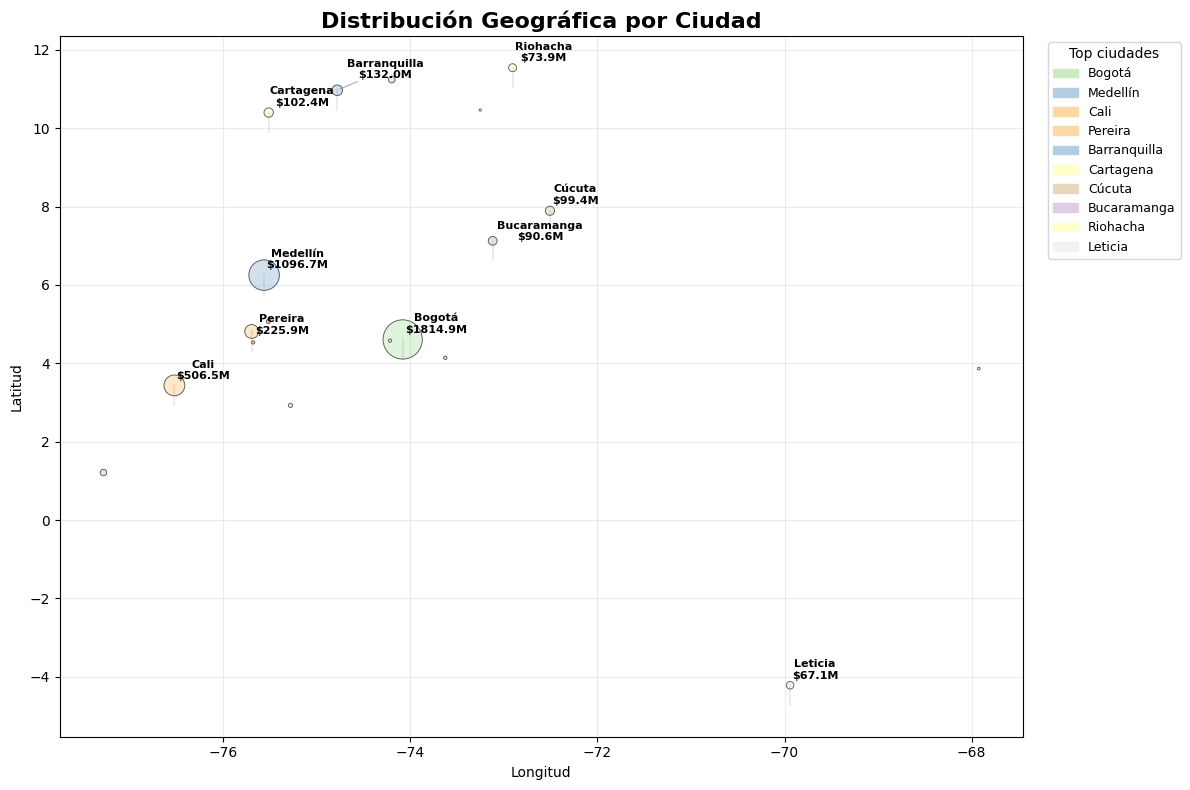

In [37]:
if 'df_geo' not in globals():
    print("Error: «df_geo» no está definido. Ejecuta antes el bloque que lo crea.")
else:
    # 1) Agregar por ciudad y coordenadas
    df_ciudades_geo = (
        df_geo
        .groupby(['Lugar de Compra', 'lat', 'lon'])['Precio']
        .sum()
        .reset_index()
    )

    if df_ciudades_geo.empty:
        print("No hay datos para trazar la distribución geográfica.")
    else:
        # 2) Ordenar ciudades por ventas
        df_ciudades_geo = df_ciudades_geo.sort_values("Precio", ascending=False)
        ciudades = df_ciudades_geo['Lugar de Compra'].unique()

        # 3) Escala de burbujas adaptativa
        max_venta = df_ciudades_geo["Precio"].max()
        # burbuja máxima ~800 puntos
        scale = max_venta / 800

        # 4) Mapa de colores estable
        cmap = plt.get_cmap("Pastel1")
        num_pastel_colors = 9
        ciudades_ordenadas = sorted(ciudades)
        color_map = {city: cmap(i % num_pastel_colors)
                     for i, city in enumerate(ciudades_ordenadas)}

        plt.figure(figsize=(12, 8))
        plt.style.use("default")

        # 5) Scatter principal
        plt.scatter(
            df_ciudades_geo["lon"],
            df_ciudades_geo["lat"],
            s=df_ciudades_geo["Precio"] / scale,
            alpha=0.6,
            c=[color_map[c] for c in df_ciudades_geo["Lugar de Compra"]],
            edgecolors="black",
            linewidths=0.7
        )

        # 6) Top 10 con líneas suaves opcionales
        top_n = df_ciudades_geo.head(10)
        for _, row in top_n.iterrows():
            plt.plot(
                [row["lon"], row["lon"]],
                [row["lat"] - 0.5, row["lat"]],
                alpha=0.15,
                color="gray"
            )

        plt.title("Distribución Geográfica por Ciudad", fontsize=16, fontweight='bold')
        plt.xlabel("Longitud")
        plt.ylabel("Latitud")

        # 7) Etiquetas ajustadas solo para Top 10
        texts = []
        for _, row in top_n.iterrows():
            label = f"{row['Lugar de Compra']}\n${row['Precio']/1e6:.1f}M"
            texts.append(plt.text(
                row["lon"], row["lat"], label, fontsize=8, weight="bold"
            ))

        adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

        # 8) Leyenda solo con ciudades Top
        legend_cities = top_n["Lugar de Compra"].unique()
        legend_patches = [
            mpatches.Patch(color=color_map[c], label=c) for c in legend_cities
        ]
        plt.legend(
            handles=legend_patches,
            bbox_to_anchor=(1.02, 1),
            loc="upper left",
            fontsize=9,
            title="Top ciudades"
        )

        plt.grid(alpha=0.25)
        plt.tight_layout()
        plt.savefig("Distribución Geográfica por Ciudad.png", dpi=300, bbox_inches="tight")
        plt.show

###**Gráfico " Acumulado facturación top 10 ciudades y cual es su participación en el monto de ventas totales"**

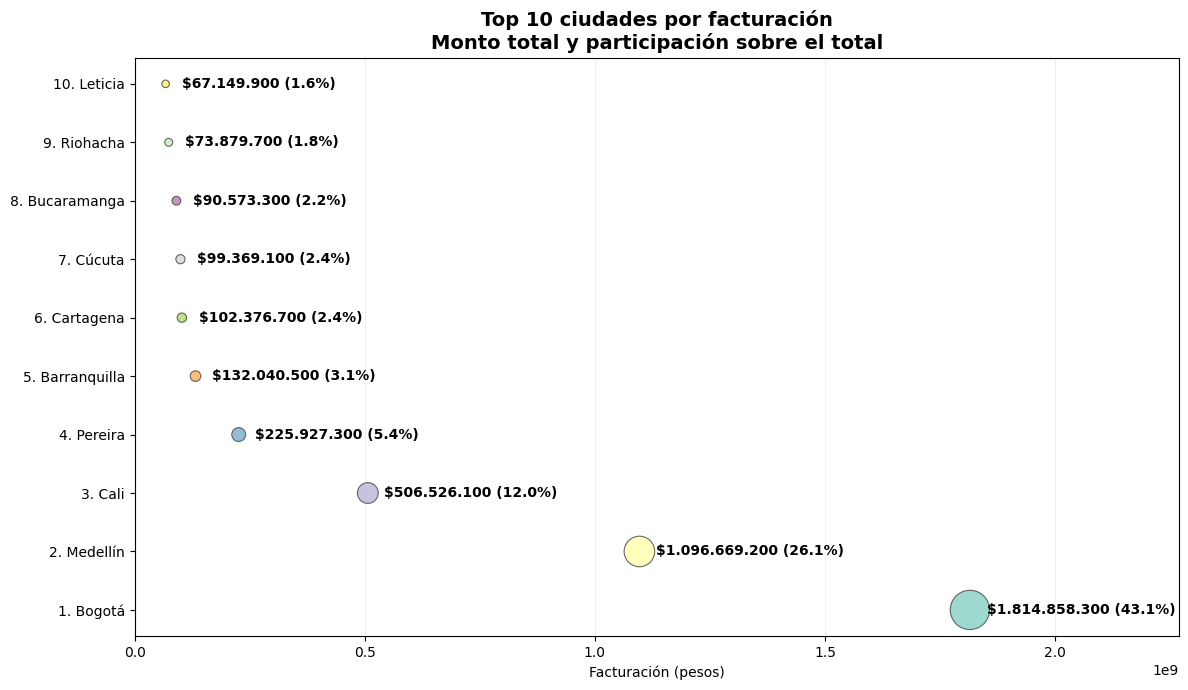

In [38]:
top10_general = top10_general.sort_values("Precio", ascending=False).reset_index(drop=True)

y = np.arange(len(top10_general)) * 1.25

# Tamaño de burbuja proporcional, max ≈ 800
sizes = top10_general["Precio"] / top10_general["Precio"].max() * 800

labels = [f"{i+1}. {ciudad}" for i, ciudad in enumerate(top10_general["Lugar de Compra"])]

porcentajes = top10_general["Precio"] / top10_general["Precio"].sum() * 100

plt.figure(figsize=(12, 7))

colors = plt.cm.Set3(np.linspace(0, 1, len(top10_general)))

plt.scatter(
    top10_general["Precio"],
    y,
    s=sizes,
    c=colors,
    alpha=0.85,
    edgecolors="#4c4c4c",
    linewidth=0.8
)

plt.xlim(0, top10_general["Precio"].max() * 1.25)

# Anotaciones con valor + porcentaje
for i, (total, pct) in enumerate(zip(top10_general["Precio"], porcentajes)):
    plt.annotate(
        f"${total:,.0f}".replace(",", ".") + f" ({pct:.1f}%)",
        xy=(total, y[i]),
        xytext=(12, 0),
        textcoords="offset points",
        va='center',
        fontweight='bold',
        fontsize=10
    )

plt.yticks(y, labels, fontsize=10)
plt.xlabel("Facturación (pesos)")
plt.title(
    "Top 10 ciudades por facturación\n"
    "Monto total y participación sobre el total",
    fontsize=14,
    fontweight="bold"
)

plt.grid(axis="x", alpha=0.2)
plt.subplots_adjust(left=0.12, right=0.97, top=0.88, bottom=0.12)
plt.tight_layout()
plt.savefig("Top 10 ciudades por facturación.png", dpi=300, bbox_inches="tight")
plt.show()


##**7.Métricas claves - KPI´s comparativos entre tiendas**

In [ ]:
# Datos base

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion = [1150880400, 1116343500, 1098019600, 1038375700]
envio_prom = [26018.61, 25216.24, 24805.68, 23459.46]
calificacion = [3.98, 4.04, 4.05, 4.00]
categorias = [t1_cat, t2_cat, t3_cat, t4_cat]

productos = [
    top5_list[0]["Producto"].iloc[0],
    top5_list[1]["Producto"].iloc[0],
    top5_list[2]["Producto"].iloc[0],
    top5_list[3]["Producto"].iloc[0]
]

# Total Top5 por tienda
total_top5_tiendas = [485431400, 442137600, 432986600, 401778200]

# DataFrame con métricas calculadas
df_comparativo_tiendas = pd.DataFrame({
    "Tienda": tiendas,
    "Facturación Total": facturacion,
    "Envío Promedio": envio_prom,
    "Calificación Promedio": calificacion,
    "Categoría más vendida": categorias,
    "Producto más vendido": productos,
    "Total Top5": total_top5_tiendas
})

# KPIs calculados
df_comparativo_tiendas["% Top5 / Total"] = (
    df_comparativo_tiendas["Total Top5"] / df_comparativo_tiendas["Facturación Total"] * 100
).round(1)

df_comparativo_tiendas["Participación %"] = (
    df_comparativo_tiendas["Facturación Total"] / sum(facturacion) * 100
).round(1)

# Formato legible
df_presentacion = df_comparativo_tiendas[[
    "Tienda",
    "Facturación Total",
    "Participación %",
    "% Top5 / Total",
    "Total Top5",
    "Envío Promedio",
    "Calificación Promedio",
    "Categoría más vendida",
    "Producto más vendido"
]].sort_values("Facturación Total", ascending=False).round(1)


df_presentacion["Facturación Formateada"] = df_presentacion["Facturación Total"].apply(
    lambda x: f"${x/1e6:.0f}M"
)
df_presentacion["Top5 Formateado"] = df_presentacion["Total Top5"].apply(
    lambda x: f"${x/1e6:.0f}M"
)

# Resultados
df_final = df_presentacion[[
    "Tienda",
    "Facturación Formateada",
    "Participación %",
    "% Top5 / Total",
    "Top5 Formateado",
    "Envío Promedio",
    "Calificación Promedio",
    "Categoría más vendida",
    "Producto más vendido"
]].round(2)

print("COMPARATIVA ESTRATÉGICA DE TIENDAS")
print(df_final.to_string(index=False))

COMPARATIVA ESTRATÉGICA DE TIENDAS
  Tienda Facturación Formateada  Participación %  % Top5 / Total Top5 Formateado  Envío Promedio  Calificación Promedio Categoría más vendida Producto más vendido
Tienda 1                 $1151M             26.1            42.2           $485M         26018.6                    4.0          Electrónicos        TV LED UHD 4K
Tienda 2                 $1116M             25.4            39.6           $442M         25216.2                    4.0          Electrónicos            Iphone 15
Tienda 3                 $1098M             24.9            39.4           $433M         24805.7                    4.0          Electrónicos         Refrigerador
Tienda 4                 $1038M             23.6            38.7           $402M         23459.5                    4.0          Electrónicos            Iphone 15


###**Gráfico " Análisis Comparativo Total"**

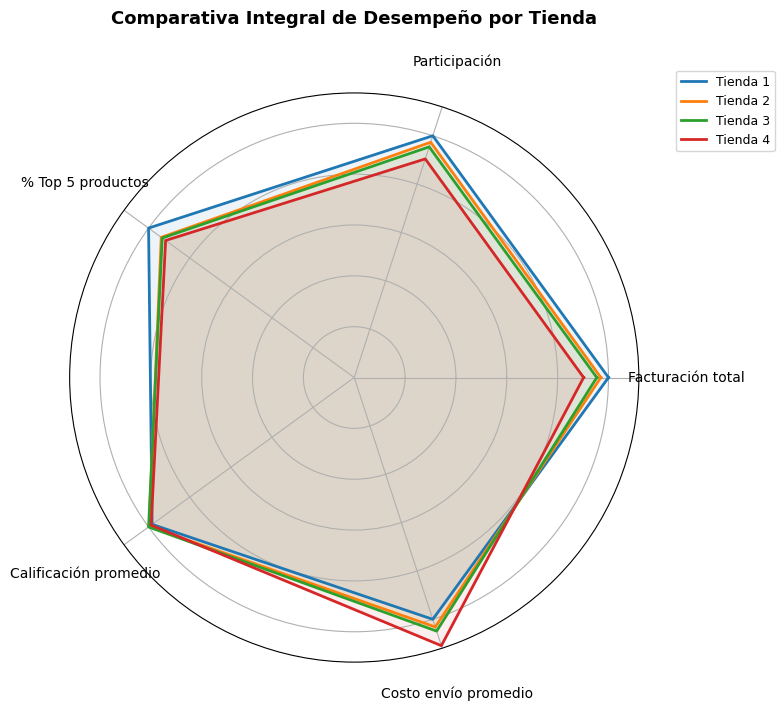

In [39]:
# COMPARATIVA TOTAL KPI´S CALCULADOS:

df = df_comparativo_tiendas.copy()

df["Fact_norm"] = df["Facturación Total"] / df["Facturación Total"].max()
df["Part_norm"] = df["Participación %"] / df["Participación %"].max()
df["Top5_norm"] = df["% Top5 / Total"] / df["% Top5 / Total"].max()
df["Calif_norm"] = df["Calificación Promedio"] / df["Calificación Promedio"].max()
df["Envio_norm"] = df["Envío Promedio"].max() / df["Envío Promedio"]  # menor envío = mejor

kpis = ["Fact_norm", "Part_norm", "Top5_norm", "Calif_norm", "Envio_norm"]
labels = ["Facturación total", "Participación", "% Top 5 productos", "Calificación promedio", "Costo envío promedio"]

N = len(kpis)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for _, row in df.iterrows():
    values = row[kpis].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=row["Tienda"])
    ax.fill(angles, values, alpha=0.08)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
for label, angle in zip(ax.get_xticklabels(), angles):
    x, y = label.get_position()
    label.set_position((x, y - 0.1))
ax.set_yticklabels([])
ax.set_title("Comparativa Integral de Desempeño por Tienda",
             fontsize=13, fontweight="bold", pad=50)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05), fontsize=9)

plt.tight_layout()
plt.savefig("Comparativa Integral de Desempeño por Tienda.png", dpi=300, bbox_inches="tight")
plt.show()

##**8.Análisis de los resultados**

Los Comparativos estratégicos realizados fueron los siguientes:

| Comparativo                         | Cómo aporta valor a la decisión                                                                 | Señal de alerta (benchmark)                                      | Resultado Obtenidos                                       |
| ----------------------------------- | ------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------- | ------------------------------------------------------------------------ |
| Facturación % vs. total 4 tiendas   | Identifica la tienda de menor contribución al portafolio de ingresos                             | <25 % de participación sostenida en el período analizado | Tienda 4 aporta 23,6 %, siendo la de menor facturación acumulada.       |
| Envío promedio vs. media tiendas    | Señala posibles ineficiencias logísticas que erosionan margen cuando el envío lo asume el cliente | >15 % por encima del promedio de tiendas                 | T1 tiene el envío más alto y T4 el más bajo; no hay patrón ventas–envío claro. |
| Calificación vs. líderes            | Mide satisfacción y probabilidad de recompra a futuro                                            | <4,0 cuando el benchmark interno se sitúa en torno a 4,0–4,1  | Todas entre 3,98 y 4,05; T2 y T3 levemente mejor posicionadas, sin brechas críticas. |
| Top productos % facturación         | Evalúa el riesgo de depender de pocos superventas o falta de tracción en el portafolio          | Top 5 <35 % o >60 % de las ventas totales de la tienda    | Todas las tiendas entre ≈39 % y 42 %; T4 es la que menor volumen absoluto genera en su Top 5. |
| Ventas geográficas - Top ciudades % | Detecta concentración excesiva en pocas ciudades o escasa presencia en mercados clave            | >70 % concentrado en 1–2 ciudades de bajo potencial     | Alta concentración en Bogotá y Medellín para todas; T4 aporta menos volumen total aun en estas plazas clave. |

##**9.Conclusiones y Recomendación**

Las tiendas muestran un patrón operativo muy similar en costos, calificaciones, estructura del portafolio y comportamiento geográfico. Sin embargo, la Tienda 4 presenta un desempeño consistentemente menor en todas las dimensiones vinculadas al volumen: facturación total, ventas de productos top y desempeño en ciudades clave.

Dado que no se identifican factores externos que justifiquen esta brecha, como costos, experiencia de cliente o mix de categorías, la diferencia responde a una menor escala estructural del negocio.

**Recomendación:**

Mantener las Tiendas 1, 2 y 3 como núcleo del portafolio asegura la mayor estabilidad, crecimiento y retorno.

Vender la Tienda 4 es una decisión estratégica coherente, ya que es la unidad con menor aporte relativo, menor capacidad de escala y sin ventajas competitivas compensatorias.